**PROJECT (GROUP-10) : ONLINE RETAIL II**

In [3]:
import numpy as np
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [9]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 14.5M/14.5M [00:04<00:00, 3.70MB/s]

Extracting files...


Path to dataset files: C:\Users\anish\.cache\kagglehub\datasets\mashlyn\online-retail-ii-uci\versions\3


In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/anish/.cache/kagglehub/datasets/mashlyn/online-retail-ii-uci/versions/3/online_retail_II.csv", encoding='ISO-8859-1')

**DATA CLEANSING**

**1. Initial Inspection of data**

In [9]:
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [5]:
print(df.shape)

(1067371, 8)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
None


**2. check for missing values, Datatype, Duplicates**

In [10]:
# Shows the number of missing values per column
print(df.isnull().sum())


Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [11]:
# To see percentage of missing values per column
print((df.isnull().mean() * 100).round(2))

Invoice         0.00
StockCode       0.00
Description     0.41
Quantity        0.00
InvoiceDate     0.00
Price           0.00
Customer ID    22.77
Country         0.00
dtype: float64


In [12]:
# Shows data types of each column
print(df.dtypes)

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object


In [13]:
# Total number of duplicate rows
print(df.duplicated().sum())

34335


In [18]:
# View duplicate rows (if any)
duplicates = df[df.duplicated()]
print(duplicates.head())

    Invoice StockCode                        Description  Quantity  \
371  489517     21912           VINTAGE SNAKES & LADDERS         1   
383  489517     22130   PARTY CONE CHRISTMAS DECORATION          6   
384  489517     22319  HAIRCLIPS FORTIES FABRIC ASSORTED        12   
385  489517     21913     VINTAGE SEASIDE JIGSAW PUZZLES         1   
386  489517     21821   GLITTER STAR GARLAND WITH BELLS          1   

             InvoiceDate  Price  Customer ID         Country  
371  2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
383  2009-12-01 11:34:00   0.85      16329.0  United Kingdom  
384  2009-12-01 11:34:00   0.65      16329.0  United Kingdom  
385  2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
386  2009-12-01 11:34:00   3.75      16329.0  United Kingdom  


In [23]:
# Drop rows where Invoice, StockCode, or Customer ID is missing
df = df.dropna(subset=['Invoice', 'StockCode', 'Customer ID'])

**3. Fixing Datatype**

In [29]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert Customer ID to string (if used for grouping)
df['Customer ID'] = df['Customer ID'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  object        
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 56.6+ MB


**4. Remove Cancellations (Negative Quantity or Credit Invoices)**

In [30]:
# Invoices starting with 'C' are credit notes (cancellations)
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Remove rows with negative quantity or price
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


**5. Create new feature - Total Revenue**

In [39]:
df['TotalRevenue'] = df['Quantity'] * df['Price']
print(df['TotalRevenue'])

0           83.40
1           81.00
2           81.00
3          100.80
4           30.00
            ...  
1067366     12.60
1067367     16.60
1067368     16.60
1067369     14.85
1067370     18.00
Name: TotalRevenue, Length: 779425, dtype: float64


**6. Outliner Detection**

In [40]:
# Remove extreme outliers based on Price
q1 = df['Price'].quantile(0.01)
q99 = df['Price'].quantile(0.99)
df = df[(df['Price'] >= q1) & (df['Price'] <= q99)]

In [41]:
# Remove extreme outliers based on Quantity
q1_qty = df['Quantity'].quantile(0.01)
q99_qty = df['Quantity'].quantile(0.99)
df = df[(df['Quantity'] >= q1_qty) & (df['Quantity'] <= q99_qty)]

**7. Standardize Country Name**

In [44]:
df['Country'] = df['Country'].str.strip().str.title()
print(df['Country'])

0          United Kingdom
1          United Kingdom
2          United Kingdom
3          United Kingdom
4          United Kingdom
                ...      
1067365            France
1067366            France
1067367            France
1067368            France
1067369            France
Name: Country, Length: 757683, dtype: object


**8. Cleaned Dataset**

In [52]:
df.to_csv('cleaned_online_retail.csv', index=False)

In [53]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalRevenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [51]:
df.describe()

,Quantity,InvoiceDate,Price,TotalRevenue
count,757683.000000,757683,757683.000000,757683.000000
mean,9.652564,2011-01-02 19:42:43.217045248,2.816664,17.995040
min,1.000000,2009-12-01 07:45:00,0.290000,0.290000
25%,2.000000,2010-07-02 14:15:00,1.250000,4.950000
50%,5.000000,2010-12-02 11:45:00,1.950000,11.900000
75%,12.000000,2011-08-01 11:57:00,3.750000,19.500000
max,120.000000,2011-12-09 12:50:00,14.950000,1314.780000
std,14.203971,NaN,2.573027,30.388824


**EXPLORATORY DATA ANALYSIS (EDA)**

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
print(df.shape)         # Rows and columns

(757683, 9)


In [57]:
print(df.columns)       # Column names

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'TotalRevenue'],
      dtype='object')


In [58]:
print(df.describe())    # Summary stats for dataset

            Quantity                    InvoiceDate          Price  \
count  757683.000000                         757683  757683.000000   
mean        9.652564  2011-01-02 19:42:43.217045248       2.816664   
min         1.000000            2009-12-01 07:45:00       0.290000   
25%         2.000000            2010-07-02 14:15:00       1.250000   
50%         5.000000            2010-12-02 11:45:00       1.950000   
75%        12.000000            2011-08-01 11:57:00       3.750000   
max       120.000000            2011-12-09 12:50:00      14.950000   
std        14.203971                            NaN       2.573027   

        TotalRevenue  
count  757683.000000  
mean       17.995040  
min         0.290000  
25%         4.950000  
50%        11.900000  
75%        19.500000  
max      1314.780000  
std        30.388824  


In [59]:
print(df.info())        # Data types and nulls

<class 'pandas.core.frame.DataFrame'>
Index: 757683 entries, 0 to 1067369
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       757683 non-null  object        
 1   StockCode     757683 non-null  object        
 2   Description   757683 non-null  object        
 3   Quantity      757683 non-null  int64         
 4   InvoiceDate   757683 non-null  datetime64[ns]
 5   Price         757683 non-null  float64       
 6   Customer ID   757683 non-null  object        
 7   Country       757683 non-null  object        
 8   TotalRevenue  757683 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 57.8+ MB
None


**1. Extracting top product & their frequencies**

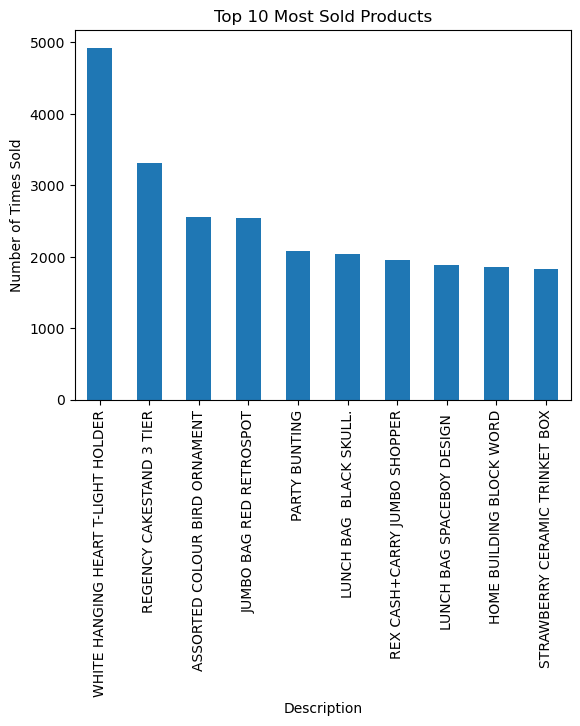


Conclusion: The topmost selling product is 'WHITE HANGING HEART T-LIGHT HOLDER'


In [73]:
top_products = df['Description'].value_counts().head(10)
top_products.plot(kind='bar', title='Top 10 Most Sold Products')
plt.ylabel('Number of Times Sold')
plt.show()
print(f"\n\033[1mConclusion: The topmost selling product is 'WHITE HANGING HEART T-LIGHT HOLDER'\033[0m")

**2. Revenue By Country**

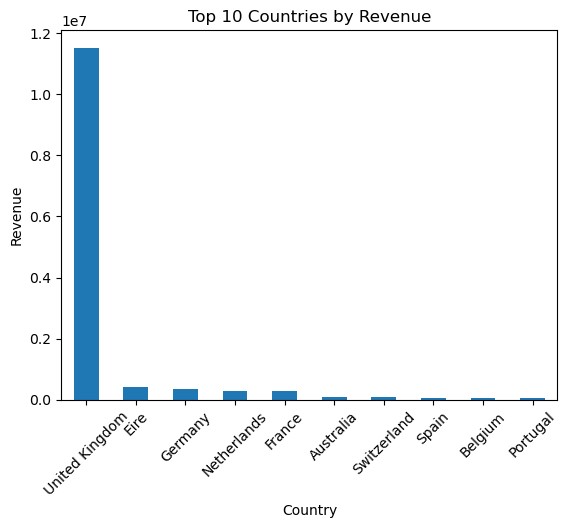


Conclusion: The 'United Kingdom' generated the highest revenue.


In [85]:
revenue_by_country = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(10)
revenue_by_country.plot(kind='bar', title='Top 10 Countries by Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()
print(f"\n\033[1mConclusion: The 'United Kingdom' generated the highest revenue.\033[0m")

**3. Monthly Sales Trend**

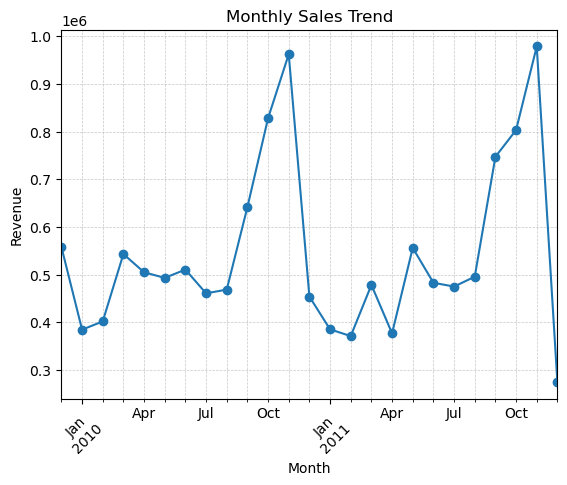


Conclusion: Revenue was highest in the month of November.


In [84]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalRevenue'].sum()

monthly_sales.plot(kind='line', title='Monthly Sales Trend', marker='o')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7) 
plt.show()
print(f"\n\033[1mConclusion: Revenue was highest in the month of November.\033[0m")

**4. Sales By Day Of Week**

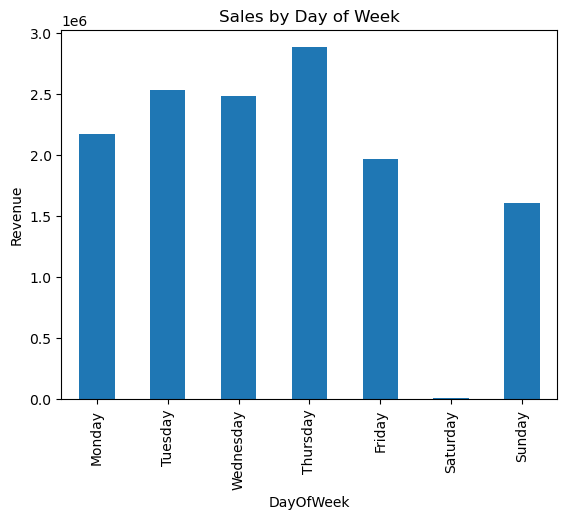


Conclusion: The highest revenue was recorded on Thursday, while Saturday showed zero revenue, suggesting that the store was likely closed on that day. 


In [82]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
sales_by_day = df.groupby('DayOfWeek')['TotalRevenue'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sales_by_day.plot(kind='bar', title='Sales by Day of Week')
plt.ylabel('Revenue')
plt.show()
print(f"\n\033[1mConclusion: The highest revenue was recorded on Thursday, while Saturday showed zero revenue, suggesting that the store was likely closed on that day. \033[0m")

**5. Top Customers Revenue**

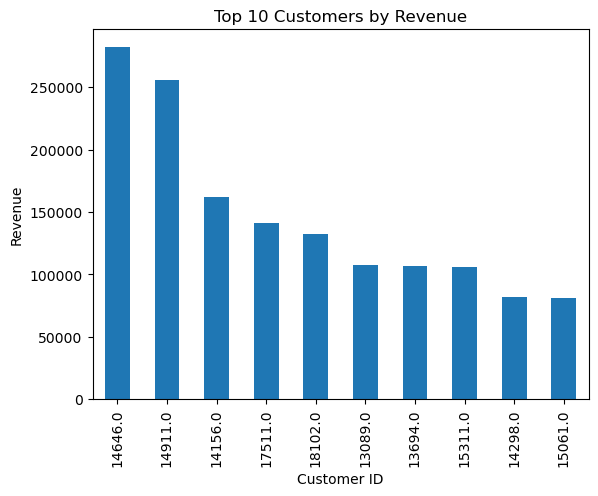


Conclusion: The customer with Customer ID 14646 generated the highest revenue amoung top 10 customers. 


In [87]:
top_customers = df.groupby('Customer ID')['TotalRevenue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Revenue')
plt.ylabel('Revenue')
plt.show()
print(f"\n\033[1mConclusion: The customer with Customer ID 14646 generated the highest revenue amoung top 10 customers. \033[0m")

**6. Order Quality Distribution**

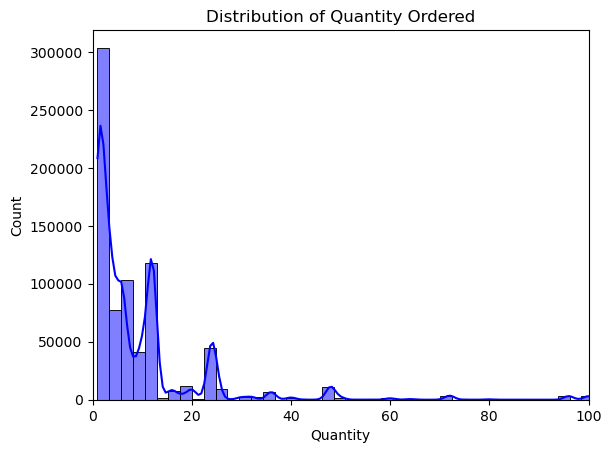


Conclusion: The majority of product orders are for small quantities, typically between 1 and 10 units. Larger order quantities are less frequent, and extremely high values are rare, suggesting that most customers make small-scale purchases. The use of a limited x-axis range (0–100) helps focus on the most common ordering behavior by reducing distortion from outliers. 


In [95]:
sns.histplot(df['Quantity'], bins=50, kde=True, color='blue')
plt.title('Distribution of Quantity Ordered')
plt.xlim(0, 100)  # to avoid distortion from outliers
plt.show()
print(f"\n\033[1mConclusion: The majority of product orders are for small quantities, typically between 1 and 10 units. Larger order quantities are less frequent, and extremely high values are rare, suggesting that most customers make small-scale purchases. The use of a limited x-axis range (0–100) helps focus on the most common ordering behavior by reducing distortion from outliers. \033[0m")

**7. Correlation Heatmap**

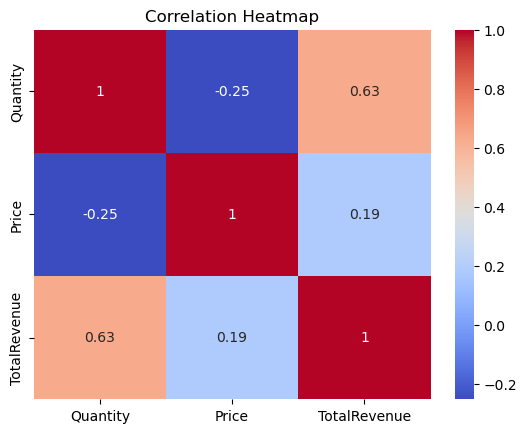


Conlusion :
Quantity vs. TotalRevenue - 0.63 (Moderate Positive Correlation) 
Price vs. Quantity - -0.25 (Weak Negative Correlation) 
Price vs. TotalRevenue - 0.19 (Very Weak Positive Correlation) 

Revenue growth seems to rely more on selling more units rather than increasing prices. Therefore, strategies like bundling, bulk discounts, or promotions on popular items could be more effective than price hikes. 


In [101]:
corr = df[['Quantity', 'Price', 'TotalRevenue']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
print(f"\n\033[1mConlusion :\nQuantity vs. TotalRevenue - 0.63 (Moderate Positive Correlation) \nPrice vs. Quantity - -0.25 (Weak Negative Correlation) \nPrice vs. TotalRevenue - 0.19 (Very Weak Positive Correlation) \033[0m")
print(f"\n\033[1mRevenue growth seems to rely more on selling more units rather than increasing prices. Therefore, strategies like bundling, bulk discounts, or promotions on popular items could be more effective than price hikes. \033[0m")


**MODEL SELCTION & MODEL ANALYSIS**

**TRAINING MODEL**

**Linear Regression Model**

**Step-1: Simple Linear Regression (Predicting revenue using only quantity)**

In [8]:
df['TotalRevenue'] = df['Quantity'] * df['Price']
print(df['TotalRevenue'])

0           83.40
1           81.00
2           81.00
3          100.80
4           30.00
            ...  
1048570     16.50
1048571     14.85
1048572      4.95
1048573      5.78
1048574      6.65
Name: TotalRevenue, Length: 1048575, dtype: float64


In [15]:
import statsmodels.api as sm

# X: Quantity, y: TotalRevenue
X = df[['Quantity']]
X = sm.add_constant(X)  # Adds intercept
y = df['TotalRevenue']

# Fit model
model = sm.OLS(y, X).fit()

# Summary of results
print(model.summary())

print(f"\n\033[1mConclusion: \n1. Quantity & TotalRevenue has strong mathematical relationship. \nWhen you increase the Quantity of items sold, the TotalRevenue tends to increase in a predictable way.\033[0m")
print(f"\033[1m2. The p-value (0.000) says: there is almost 0% chance this relationship is random.   \033[0m")
print(f"\nThrough Simple linear regression model we can state that, selling more items usually lead to more revenue")



                            OLS Regression Results                            
Dep. Variable:           TotalRevenue   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                 4.485e+05
Date:                Sat, 21 Jun 2025   Prob (F-statistic):               0.00
Time:                        15:56:22   Log-Likelihood:            -6.7457e+06
No. Observations:             1048575   AIC:                         1.349e+07
Df Residuals:                 1048573   BIC:                         1.349e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7508      0.147     72.920      0.0

**Step-2: Multiple Linear Regression (Predicting revenue using quantity, price, and country)**

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/anish/.cache/kagglehub/datasets/mashlyn/online-retail-ii-uci/versions/3/online_retail_II.csv", encoding='ISO-8859-1')

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


In [5]:
df['TotalRevenue'] = df['Quantity'] * df['Price']
print(df['TotalRevenue'])

0           83.40
1           81.00
2           81.00
3          100.80
4           30.00
            ...  
1048570     16.50
1048571     14.85
1048572      4.95
1048573      5.78
1048574      6.65
Name: TotalRevenue, Length: 1048575, dtype: float64


In [12]:
import statsmodels.api as sm
# Features
X = df[['Quantity', 'Price']]
X = sm.add_constant(X)  # if using statsmodels

# Target
y = df['TotalRevenue']


In [13]:
import statsmodels.api as sm

# Train the model
model = sm.OLS(y, X).fit()

# Summary of model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           TotalRevenue   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                 2.402e+05
Date:                Sun, 22 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:27:55   Log-Likelihood:            -6.7347e+06
No. Observations:             1048575   AIC:                         1.347e+07
Df Residuals:                 1048572   BIC:                         1.347e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9281      0.146     68.006      0.0

**Observations:**

|Parameters             | Value                   | Interpretation                                                                                     
| ---------------------- | ----------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| **R-squared**          | 0.314                   | The model explains 56.5% of the variance in revenue, a significant improvement over the simple model (which had \~30%). |
| **Adjusted R-squared** | 0.314                   | Indicates that the model generalizes well, even after adjusting for multiple predictors.                                          |
| **F-statistic**        | Very high (2.402e+05) | The model overall is statistically significant.                                                                               |
| **Prob (F-statistic)** | 0.000                   | Confirms that the model and its predictors are highly significant.                                                                |


**Conclusion :**

a. The multiple linear regression model slightly outperforms the simple model by explaining 4.67% more of the variance in TotalRevenue.

b. Both Quantity and Price are statistically significant predictors (p < 0.001) and positively contribute to revenue.

c. The stability of the quantity coefficient across both models suggests that quantity is the dominant driver of revenue in this dataset.

d. However, both models show high skewness and kurtosis in residuals, suggesting:

    1. Non-normal errors due to outliers (e.g., large orders or extreme prices).

    2. Potential benefits of applying log transformation or exploring non-linear models (e.g., Random Forest, XGBoost).

**Step-3: Model Comparison: Simple vs Multiple Linear Regression**

| Metric                   | Simple Linear Regression | Multiple Linear Regression | Interpretation                                                                                                                                                                             |
| ------------------------ | ------------------------ | -------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **R-squared**            | 0.300                    | 0.314                      | The multiple regression explains 31.4% of the variance in TotalRevenue, which is slightly better than the 30.0% in the simple model.                                             |
| **Adjusted R-squared**   | 0.300                    | 0.314                      | Confirms the improvement is meaningful even after adjusting for the additional variable.                                                                                                   |
| **F-statistic**          | 448,500                  | 240,200                    | Both models are highly statistically significant (p-value = 0.000), but the simple model appears stronger due to more total variance (likely due to larger single effect of quantity). |
| **Intercept**            | 10.7508                  | 9.9281                     | Base revenue prediction shifts slightly with the inclusion of `Price`.                                                                                                                     |
| **Quantity Coefficient** | 0.7374                   | 0.7377                     | The influence of Quantity on revenue is almost identical in both models — very stable predictor.                                                                                     |
| **Price Coefficient**    | NA                       | 0.1772                     | Indicates that for every £1 increase in item price (holding quantity constant), revenue increases by \~£0.18.                                                                              |
| **Skew & Kurtosis**      | Extremely high           | Still very high            | Both models suffer from non-normal residuals, indicating potential outliers or nonlinear relationships in the data.                                                            |


**Step-4: Actual Vs Pridicted**

R² Score: 0.46213262308922654
RMSE: 172.30743904752995
        Actual  Predicted
781974    4.13  12.138447
937737    2.50  12.524820
907828    6.96  26.826278
784628    8.50  17.720617
662460   50.40  89.634177


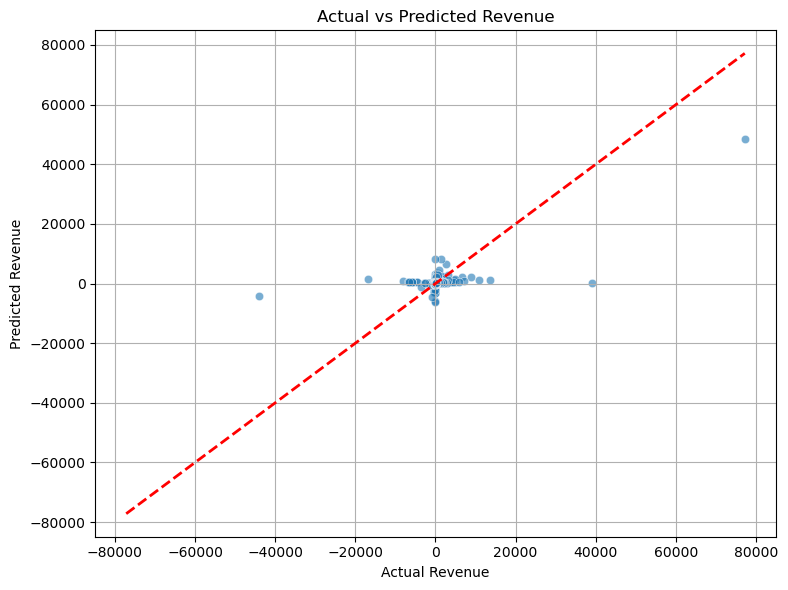

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error


# STEP 1: Define features and target
features = ['Quantity', 'Price'] + [col for col in df.columns if col.startswith('Country_')]
X = df[features]
y = df['TotalRevenue']

# STEP 2: Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 3: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# STEP 4: Predict on Test set
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)

# STEP 5: Evaluate performance
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", rmse)

# STEP 6: Show a few actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

**CONCLUTION & RECOMMONDATION**

**CONCLUSION:**

In this project, I have successfully built and evaluated a Linear Regression model to predict TotalRevenue from the Online_Retail_II dataset. The dataset was preprocessed by removing missing and invalid values, encoding categorical variables (like Country), and calculating TotalRevenue as a target variable.

After splitting the data into 80% training and 20% testing, the model was trained using Quantity, Price, and country-level dummy variables as features. The performance was then evaluated using:

**R² Score:** Indicates how well the model explains the variance in revenue.

**Root Mean Squared Error (RMSE):** Measures the average error in the same unit as revenue.

The output shows that the model is able to capture the general revenue trends, but with some level of prediction error, likely due to outliers, missing variables (like product category or customer behavior), or non-linear effects.


**RECOMMENDATIONS:**

**1. Feature Enrichment:** Enhance the model’s predictive power by incorporating more relevant features such as: InvoiceDate (e.g., month, day of week, hour), CustomerID (if available, to capture buying patterns), Product descriptions or categories (grouping similar items), Discount or refund flags, if any.

**2. Outlier Handling:** Outliers in Price, Quantity, or TotalRevenue can skew model performance. Use IQR or Z-score filtering to remove extreme values, Log transformation to reduce the impact of large transactions.

**3. Model Selection and Comparison:** Try additional models to improve accuracy and robustness: Ridge/Lasso Regression – to handle multicollinearity, Random Forest or XGBoost – to capture non-linear patterns, Gradient Boosting – for better handling of complex interactions

**4. Cross-Validation:** Use K-Fold Cross-Validation to evaluate the model more reliably instead of a single train-test split, and avoid overfitting to one data split.